In [1]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/dataset/netflix1.csv')
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


FUNNEL CHART

In [2]:
import plotly.express as px
data = dict(
    number=[39, 27.4, 20.6, 11, 2],
    stage=["Website visit", "Downloads", "Potential customers", "Requested price", "invoice sent"])
fig = px.funnel(data, x='number', y='stage')
fig.show()

GANTT CHART

In [ ]:
import plotly.express as px
import pandas as pd
#sample data for tasks
data=[
    dict(Task="Concept Development",Start='2024-07-03',Finish='2024-07-05'),
    dict(Task="Market Research",Start='2024-07-05',Finish='2024-07-10'),
    dict(Task="Product Design",Start='2024-07-08',Finish='2024-07-15'),
    dict(Task="Prototype",Start='2024-07-08',Finish='2024-07-17')
]
#create a Dataframe from the data
df=pd.DataFrame(data)
#convert the 'start' and 'finish' columns to datatime
df['Start']= pd.to_datetime(df['Start'])
df['Finish']= pd.to_datetime(df['Finish'])
#plotly Gantt chart
fig=px.timeline(df,x_start='Start',x_end='Finish',y='Task',title='Risk management')
#show the figure
fig.show()



/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



HISTOGRAM CHART

In [ ]:
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = '/content/drive/MyDrive/dataset/netflix1.csv'
netflix_data = pd.read_csv(file_path)

# Filter the dataset for Movies only
movies_data = netflix_data[netflix_data['type'] == 'Movie']

# Extract the duration in minutes from the duration column
movies_data['duration_minutes'] = movies_data['duration'].str.replace(' min', '').astype(int)

# Create the histogram
fig = px.histogram(movies_data, x='duration_minutes', nbins=30, title='Distribution of Movie Durations')

# Show the chart
fig.show()





<ipython-input-8-0d820bdc0a6e>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



AREA CHART

In [ ]:
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = '/content/drive/MyDrive/dataset/netflix1.csv'
netflix_data = pd.read_csv(file_path)

# Convert the date_added column to datetime format
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])

# Group by the date and count the number of titles added
date_count = netflix_data.groupby(netflix_data['date_added'].dt.to_period('M')).size().reset_index(name='count')
date_count['date_added'] = date_count['date_added'].dt.to_timestamp()

# Create the area chart
fig = px.area(date_count, x='date_added', y='count', title='Number of Titles Added Over Time')

# Show the chart
fig.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



SUNBURST CHART

In [ ]:
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = '/content/drive/MyDrive/dataset/netflix1.csv'
netflix_data = pd.read_csv(file_path)

# Prepare the data
sunburst_data = netflix_data[['type', 'country', 'listed_in']].dropna()

# Create the sunburst chart
fig = px.sunburst(sunburst_data,
                  path=['type', 'country', 'listed_in'],
                  title="Netflix Content Sunburst Chart",
                  width=800, height=800)

# Show the chart
fig.show()


BUBBLE CHART

In [ ]:
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = '/content/drive/MyDrive/dataset/netflix1.csv'
netflix_data = pd.read_csv(file_path)

# Filter the dataset for Movies only and drop rows with missing values in the relevant columns
movies_data = netflix_data[netflix_data['type'] == 'Movie'].dropna(subset=['release_year', 'rating', 'duration'])

# Extract the duration in minutes from the duration column
movies_data['duration_minutes'] = movies_data['duration'].str.replace(' min', '').astype(int)

# Create the bubble chart
fig = px.scatter(movies_data,
                 x='release_year',
                 y='rating',
                 size='duration_minutes',
                 color='rating',
                 title='Netflix Movies Bubble Chart',
                 labels={'release_year': 'Release Year', 'rating': 'Rating', 'duration_minutes': 'Duration (minutes)'},
                 hover_data=['title'])

# Show the chart
fig.show()


WORD CLOUD CHART

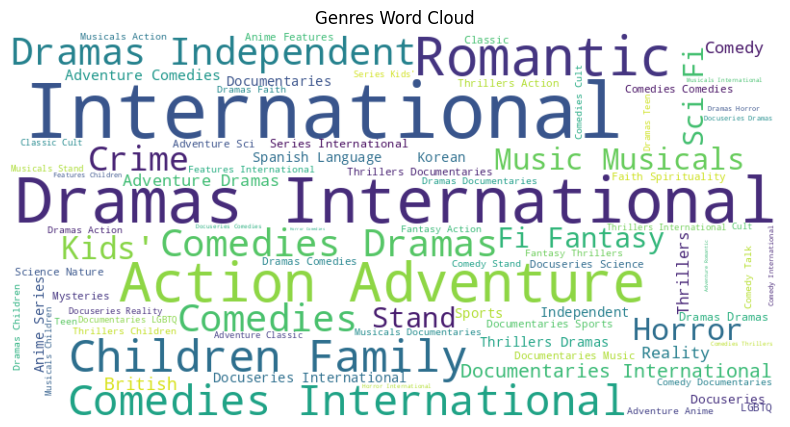

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/dataset/netflix1.csv'
netflix_data = pd.read_csv(file_path)

# Combine all the genres into a single string
text = ' '.join(genre for genre in netflix_data['listed_in'].dropna())

# Additional stopwords to remove common words that aren't useful in the word cloud
stopwords = set(STOPWORDS)
stopwords.update(["TV", "Shows", "Movies"])

# Create the word cloud
wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genres Word Cloud')
plt.show()


TREE MAP CHART

In [ ]:
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = '/content/drive/MyDrive/dataset/netflix1.csv'
netflix_data = pd.read_csv(file_path)

# Drop rows with missing values in the relevant columns
netflix_data = netflix_data.dropna(subset=['type', 'country', 'director'])

# Create the treemap
fig = px.treemap (netflix_data,
                 path=['type', 'country', 'director'],
                 values='release_year',  # Each title is represented once, so we can use show_id to count
                 title="Netflix Content Treemap",
                 color='type',  # Color by content type (Movie or TV Show)
                 hover_data={'show_id': False})  # Hide show_id on hover

fig.show()


PARETO CHART

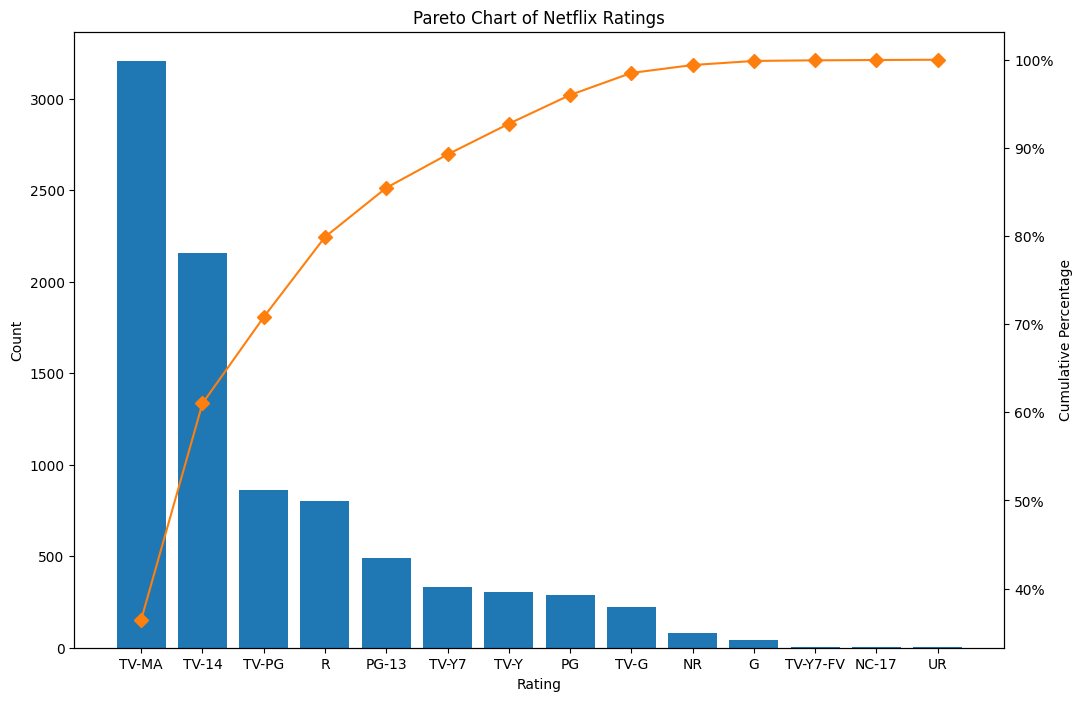

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/dataset/netflix1.csv'
netflix_data = pd.read_csv(file_path)

# Count the occurrences of each rating
rating_counts = netflix_data['rating'].value_counts()

# Sort the ratings by count in descending order
rating_counts = rating_counts.sort_values(ascending=False)

# Calculate the cumulative percentage
cumulative_percentage = rating_counts.cumsum() / rating_counts.sum() * 100

# Create the Pareto chart
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for the counts
ax1.bar(rating_counts.index, rating_counts.values, color='C0')
ax1.set_xlabel('Rating')
ax1.set_ylabel('Count')
ax1.set_title('Pareto Chart of Netflix Ratings')

# Line plot for the cumulative percentage
ax2 = ax1.twinx()
ax2.plot(rating_counts.index, cumulative_percentage, color='C1', marker='D', ms=7)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x)}%'))
ax2.set_ylabel('Cumulative Percentage')

plt.show()


CHOROPLETH CHART

In [ ]:
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = '/content/drive/MyDrive/dataset/netflix1.csv'
netflix_data = pd.read_csv(file_path)

# Drop rows with missing values in the 'country' column
netflix_data = netflix_data.dropna(subset=['country'])

# Count the number of titles produced in each country
country_counts = netflix_data['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Create the choropleth map
fig = px.choropleth(country_counts,
                    locations='country',
                    locationmode='country names',
                    color='count',
                    hover_name='country',
                    color_continuous_scale='Viridis',
                    title='Number of Netflix Titles by Country')

fig.show()
